# 音乐曲风分类
### 程式源自: https://www.kdnuggets.com/2020/02/audio-data-analysis-deep-learning-python-part-2.html

## 载入相关套件

In [1]:
# 载入相关套件
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display
import os
import pathlib
import csv
import tensorflow as tf
from tensorflow.keras import layers

In [2]:
# 不显示警告讯息
import warnings
warnings.filterwarnings('ignore')

## 载入档案

In [25]:
# 载入音乐档案
genres = 'blues classical country disco hiphop jazz metal pop reggae rock'.split()

X = None
y = []
for i, g in enumerate(genres):
    pathlib.Path(f'./GTZAN/genres//{g}').mkdir(parents=True, exist_ok=True)
    for filename in os.listdir(f'./GTZAN/genres/{g}'):
        songname = f'./GTZAN/genres/{g}/{filename}'
        data, sr = librosa.load(songname, mono=True, duration=25)
        mfcc = librosa.feature.mfcc(y=data, sr=sr, n_mfcc=40)
        # print(data.shape, mfcc.shape)
        if X is None:
            X = mfcc.reshape(1, 40, -1, 1)
        else:
            X = np.concatenate((X, mfcc.reshape(1, 40, -1, 1)), axis=0)
        y.append(i)
        
print(X.shape, len(y))

(1000, 40, 1077, 1) 1000


In [29]:
X[0]

array([[[-211.48465   ],
        [-208.94481   ],
        [-193.90889   ],
        ...,
        [-153.68745   ],
        [-114.75746   ],
        [ -92.81227   ]],

       [[  99.022964  ],
        [ 101.24678   ],
        [ 102.24396   ],
        ...,
        [  94.26633   ],
        [  73.02428   ],
        [  62.57588   ]],

       [[ -10.634697  ],
        [  -9.346699  ],
        [   1.9154348 ],
        ...,
        [   9.260414  ],
        [  19.25284   ],
        [  12.586103  ]],

       ...,

       [[   7.1240273 ],
        [   3.1041088 ],
        [  -3.0628586 ],
        ...,
        [  -3.839465  ],
        [  -3.0830624 ],
        [   0.40250283]],

       [[  -1.8689755 ],
        [  -1.3740795 ],
        [  -4.71682   ],
        ...,
        [  -2.7694275 ],
        [  -3.720017  ],
        [  -7.677967  ]],

       [[   4.0560246 ],
        [   2.3471432 ],
        [  -1.6581439 ],
        ...,
        [   1.7598417 ],
        [   0.9894233 ],
        [  -4.795616  ]]

In [35]:
X.min(axis=0).shape

(40, 1077, 1)

In [36]:
# 常态化
X_norm = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))

In [37]:
# 资料切割
from sklearn.model_selection import train_test_split
y = np.array(y)
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=.2)
X_train.shape, X_test.shape

((800, 40, 1077, 1), (200, 40, 1077, 1))

In [45]:
# CNN 模型
input_shape = X_train.shape[1:]
model = tf.keras.Sequential(
    [
        tf.keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(10, activation="softmax"),
    ]
)

In [43]:
# CNN 模型
input_shape = X_train.shape[1:]
model = tf.keras.Sequential(
    [
        tf.keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), strides=(2, 2), activation="relu"),
        layers.AveragePooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), strides=(2, 2), activation="relu"),
        layers.AveragePooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), padding='same'),
        layers.AveragePooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(64, activation="relu"),
        layers.Dropout(0.5),
        layers.Dense(10, activation="softmax"),
    ]
)

In [46]:
# 设定优化器(optimizer)、损失函数(loss)、效能衡量指标(metrics)的类别
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 模型训练
history = model.fit(X_train, y_train, epochs=20, validation_split=0.2)

# 评分(Score Model)
score=model.evaluate(X_test, y_test, verbose=0)

for i, x in enumerate(score):
    print(f'{model.metrics_names[i]}: {score[i]:.4f}')

Epoch 1/20
20/20 [==============================] - 2s 87ms/step - loss: 2.8207 - accuracy: 0.1217 - val_loss: 2.2746 - val_accuracy: 0.1813
Epoch 2/20
20/20 [==============================] - 2s 79ms/step - loss: 2.2356 - accuracy: 0.2121 - val_loss: 2.1707 - val_accuracy: 0.2000
Epoch 3/20
20/20 [==============================] - 2s 79ms/step - loss: 2.0159 - accuracy: 0.3565 - val_loss: 1.9702 - val_accuracy: 0.2313
Epoch 4/20
20/20 [==============================] - 2s 79ms/step - loss: 1.6560 - accuracy: 0.4448 - val_loss: 1.7706 - val_accuracy: 0.3562
Epoch 5/20
20/20 [==============================] - 2s 79ms/step - loss: 1.3787 - accuracy: 0.5731 - val_loss: 1.7377 - val_accuracy: 0.3625
Epoch 6/20
20/20 [==============================] - 2s 79ms/step - loss: 1.1295 - accuracy: 0.6587 - val_loss: 1.4760 - val_accuracy: 0.4812
Epoch 7/20
20/20 [==============================] - 2s 80ms/step - loss: 0.8118 - accuracy: 0.7710 - val_loss: 1.5183 - val_accuracy: 0.4812
Epoch 8/20
20

## 准确率绘图

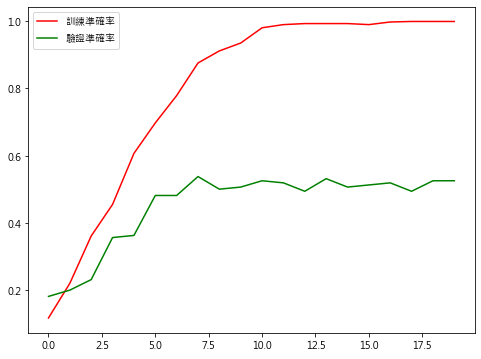

In [48]:
# 对训练过程的准确率绘图
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] 
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], 'r', label='训练准确率')
plt.plot(history.history['val_accuracy'], 'g', label='验证准确率')
plt.legend()

## 训练准确率高达99.89%，而验证准确率只有52.50%，表示模型有过度拟合(Overfitting)的现象。

## 载入档案

In [56]:
# 载入音乐档案
X = None
y = []
for i, g in enumerate(genres):
    pathlib.Path(f'./GTZAN/genres//{g}').mkdir(parents=True, exist_ok=True)
    for filename in os.listdir(f'./GTZAN/genres/{g}'):
        songname = f'./GTZAN/genres/{g}/{filename}'
        data, sr = librosa.load(songname, mono=True, duration=25)
        try:
            if i == 0:
                segment_length = int(data.shape[0] / 10)
            for j in range(10):
                segment = data[j * segment_length: (j+1) * segment_length]
                # print(segment.shape)
                mfcc = librosa.feature.mfcc(y=segment, sr=sr, n_mfcc=40)
                # print(data.shape, mfcc.shape)
                if X is None:
                    X = mfcc.reshape(1, 40, -1, 1)
                else:
                    X = np.concatenate((X, mfcc.reshape(1, 40, -1, 1)), axis=0)
                y.append(i)
        except:
            print(i)
            raise Exception('')
print(X.shape, len(y))

(10000, 40, 108, 1) 10000


In [57]:
# 常态化
X_norm = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))

In [58]:
# 资料切割
from sklearn.model_selection import train_test_split
y = np.array(y)
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=.2)
X_train.shape, X_test.shape

((8000, 40, 108, 1), (2000, 40, 108, 1))

In [59]:
# CNN 模型
input_shape = X_train.shape[1:]
model = tf.keras.Sequential(
    [
        tf.keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(10, activation="softmax"),
    ]
)

In [60]:
# 设定优化器(optimizer)、损失函数(loss)、效能衡量指标(metrics)的类别
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 模型训练
history = model.fit(X_train, y_train, epochs=20, validation_split=0.2)

# 评分(Score Model)
score=model.evaluate(X_test, y_test, verbose=0)

for i, x in enumerate(score):
    print(f'{model.metrics_names[i]}: {score[i]:.4f}')

Epoch 1/20
200/200 [==============================] - 3s 11ms/step - loss: 2.1546 - accuracy: 0.2051 - val_loss: 1.4888 - val_accuracy: 0.4625
Epoch 2/20
200/200 [==============================] - 2s 11ms/step - loss: 1.3956 - accuracy: 0.4923 - val_loss: 1.3146 - val_accuracy: 0.5213
Epoch 3/20
200/200 [==============================] - 2s 11ms/step - loss: 1.1774 - accuracy: 0.5892 - val_loss: 1.1335 - val_accuracy: 0.6237
Epoch 4/20
200/200 [==============================] - 2s 11ms/step - loss: 1.0417 - accuracy: 0.6318 - val_loss: 1.1006 - val_accuracy: 0.6269
Epoch 5/20
200/200 [==============================] - 2s 11ms/step - loss: 0.9482 - accuracy: 0.6796 - val_loss: 1.0217 - val_accuracy: 0.6506
Epoch 6/20
200/200 [==============================] - 2s 11ms/step - loss: 0.8718 - accuracy: 0.6868 - val_loss: 1.0088 - val_accuracy: 0.6550
Epoch 7/20
200/200 [==============================] - 2s 11ms/step - loss: 0.8039 - accuracy: 0.7179 - val_loss: 0.9686 - val_accuracy: 0.6762

## 准确率绘图

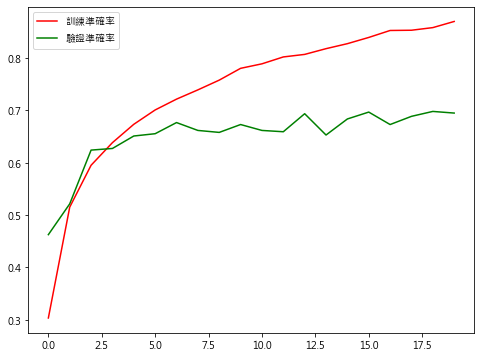

In [61]:
# 对训练过程的准确率绘图
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] 
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], 'r', label='训练准确率')
plt.plot(history.history['val_accuracy'], 'g', label='验证准确率')
plt.legend()